In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## Exploratory Data Analysis

In [106]:
Exp_and_Imp = pd.read_csv('import_and_export.csv')

In [107]:
Exp_and_Imp.head()

,location,category,flow,measure,Unit,Date,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376


In [125]:
Exp_and_Imp.dtypes

Country      object
category     object
flow         object
measure      object
Unit         object
Year          int64
Value       float64
dtype: object

In [126]:
# Renaming the column names 

Exp_and_Imp = Exp_and_Imp.rename(columns={"Date":"Year","location":"Country"})
Exp_and_Imp.head()


,Country,category,flow,measure,Unit,Year,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376


In [117]:
Exp_and_Imp.shape 

(60, 7)

In [111]:
duplicate_rows_df= Exp_and_Imp[Exp_and_Imp.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [118]:
print(Exp_and_Imp.isnull().sum()) 


Country     0
category    0
flow        0
measure     0
Unit        0
Year        0
Value       0
dtype: int64


<AxesSubplot:xlabel='Value'>

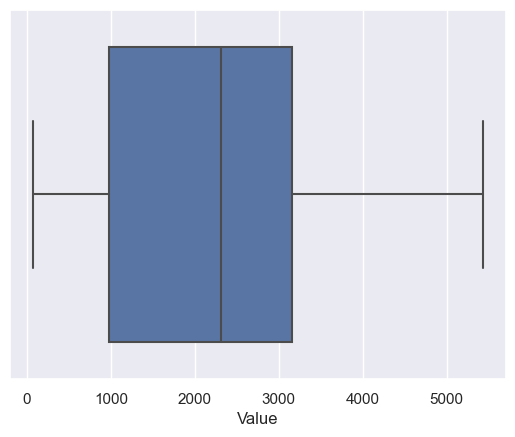

In [119]:
sns.boxplot(x=Exp_and_Imp['Value']) 

## Descriptive Statistics

In [131]:
Exp_and_Imp.describe() # Why does it looks like this 

,Year,Value
count,60.00000,60.000000
mean,2016.50000,2180.134800
std,2.89652,1461.661048
min,2012.00000,67.734000
25%,2014.00000,979.252250
50%,2016.50000,2315.629000
75%,2019.00000,3161.097500
max,2021.00000,5437.156000


In [177]:
# Filter the data to only include imports and exports
data = Exp_and_Imp[Exp_and_Imp['flow'].isin(['Imports', 'Exports'])]

<AxesSubplot:ylabel='Year'>

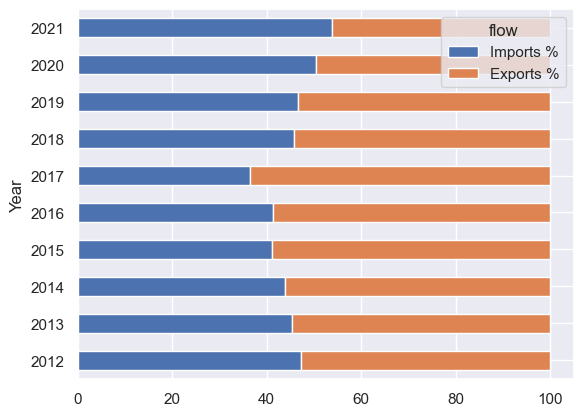

In [182]:
# Pivot the data to create a new DataFrame with years as columns and flows as rows
pivot_data = data.pivot_table(index='Year', columns='flow', values='Value')
pivot_data['Total'] = pivot_data['Imports'] + pivot_data['Exports']
pivot_data['Imports %'] = pivot_data['Imports'] / pivot_data['Total'] * 100
pivot_data['Exports %'] = pivot_data['Exports'] / pivot_data['Total'] * 100

# Create a horizontal stacked bar chart
pivot_data[['Imports %', 'Exports %']].plot(kind='barh', stacked=True)